# **Importation des packages**

In [1]:
import sys
import gensim as gs
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS as SW
from pprint import pprint

import pyLDAvis.gensim_models
import snscrape.modules.twitter as sntwitter
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

import chart_studio
import chart_studio.plotly as py 
import chart_studio.tools as tls
import matplotlib.pyplot as plt 

import json, requests, emoji, regex, re, string
from collections import Counter
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pyLDAvis.gensim_models
import snscrape.modules.twitter as sntwitter
from sklearn.model_selection import GridSearchCV
from imp import reload

from wordcloud import STOPWORDS
from nltk.corpus import stopwords
stopwords = set(stopwords.words('french'))

import spacy as scy
from spacy.tokenizer import Tokenizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

%matplotlib inline
import warnings
warnings.filterwarnings('ignore','int', category=DeprecationWarning)

c:\Users\PEGON\Desktop\textmining\venv\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


# **III. SENTIMENTAL ANALYSIS**

In [ ]:
df_tweets=pd.read_csv(r"data//TKN_FINAL.csv")
df_good = df_tweets.copy()

df_good = df_good.drop('Id Tweet', axis=1)
df_good = df_good.drop('Unnamed: 0', axis=1)
df_good = df_good.drop('Text', axis=1)
df_good = df_good.drop('Display Name', axis=1)
df_good = df_good.drop('Like Count', axis=1)
df_good = df_good.drop('Vérifié', axis=1)
df_good = df_good.drop('Language', axis=1)
df_good = df_good.drop('lemmatized_token', axis=1)
df_good = df_good.drop('tokens', axis=1)
df_good = df_good.drop('tokens_2_text', axis=1)
df_good = df_good.drop('lemma', axis=1)

df_good.head(5)

In [ ]:
df_good.rename(columns = {'Datetime':'Date'}, inplace = True)
df_good['Date'] = pd.to_datetime(df_good['Date'])
df_good['Date'] = df_good['Date'].dt.strftime('%d/%m/%Y')

df_gg = df_good.copy()

df_good

In [ ]:
# Creation function to get the polarity 

from textblob import TextBlob

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create one new column on df
df_good['Polarity'] = df_good['Clean'].apply(getPolarity)

df_good.head(5)

In [ ]:
# Create a function to compute negative, neutral & positive sentiments 
def getSentiment(polarity):
    if (polarity == 0):
        return "Neutral"
    elif (polarity > 0 and polarity <= 0.3):
        return "Weakly Positive"
    elif (polarity > 0.3 and polarity <= 0.6):
        return "Positive"
    elif (polarity > 0.6 and polarity <= 1):
        return "Strongly Positive"
    elif (polarity > -0.3 and polarity <= 0):
        return "Weakly Negative"
    elif (polarity > -0.6 and polarity <= -0.3):
        return "Negative"
    elif (polarity > -1 and polarity <= -0.6):
        return "Strongly Negative"

# Create one new column on df
df_good['Sentiment'] = df_good['Polarity'].apply(getSentiment)

df_good.head(15)

In [ ]:
# Plot & viz the sentiment count 

plt.title('Sentiment Analysis')
df_good['Sentiment'].value_counts().plot(kind='bar')
plt.xlabel('Sentiments')
plt.ylabel('Counts')

plt.show()

In [ ]:
# Get the count of each article per date 
polarity_count = df_good.groupby(['Date']).count()['Polarity']
polarity = df_good.groupby(['Date']).sum()['Polarity']

polarity_count

In [ ]:
# Average sentiment for each day over time
polarity_avg = polarity / polarity_count
polarity_avg

In [ ]:
# FINAL DF DATE/SENTIMENT/VALUE 

pol = pd.DataFrame(polarity_avg)

# Create a function to compute negative, neutral & positive sentiments 
def getSentiments(score):
    if score <= 0.04:
        return 'Positive --'
    elif score <= 0.05:
        return 'Positive -'
    elif score <= 0.07:
        return 'Positive +'        
    else:
        return 'Positive ++'

# Weighted Sentiments

def getValues(score):
    if score <= 0.04:
        return -3
    elif score <= 0.05:
        return -2
    elif score <= 0.06:
        return 1
    elif score <= 0.08:
        return 2
    elif score <= 0.10:
        return 3
    elif score <= 0.15:
        return 5                   
    else:
        return 7

# Create one new column on df
pol['Sentiment'] = pol['Polarity'].apply(getSentiments)
pol['Value'] = pol['Polarity'].apply(getValues)
pol = pol.iloc[: , 1:]
pol = pol.reset_index(inplace=False)
pol = pol.sort_values(by=['Date'], ascending=True)

pol

In [ ]:
import plotly.express as px

df = pol
fig = px.bar(df, x='Date', y='Value', color="Sentiment", title="Sentimental Value Over Time")
fig.show()

In [ ]:
# Plot the average sentiment over time

plt.figure(figsize=(12.33,4.5))
plt.title('Sentiment Average Over Time')
plt.plot(polarity_avg.index, polarity_avg)

In [ ]:
pol

# **III. SENTIMENTAL ANALYSIS 2**

In [ ]:
df_tweets=pd.read_csv("TKN_FINAL.csv")
df_gg = df_tweets.copy()

df_gg = df_gg.drop('Id Tweet', axis=1)
df_gg = df_gg.drop('Unnamed: 0', axis=1)
df_gg = df_gg.drop('Text', axis=1)
df_gg = df_gg.drop('Display Name', axis=1)
df_gg = df_gg.drop('Like Count', axis=1)
df_gg = df_gg.drop('Vérifié', axis=1)
df_gg = df_gg.drop('Language', axis=1)
df_gg = df_gg.drop('lemmatized_token', axis=1)
df_gg = df_gg.drop('tokens', axis=1)
df_gg = df_gg.drop('tokens_2_text', axis=1)
df_gg = df_gg.drop('lemma', axis=1)

df_gg.head(5)

In [ ]:
df_gg.rename(columns = {'Datetime':'Date'}, inplace = True)
df_gg['Date'] = pd.to_datetime(df_gg['Date'])
df_gg['Date'] = df_gg['Date'].dt.strftime('%d/%m/%Y')

df_gg.head(10)

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def vadar_sentiment(text):
    """ Calculate and return the nltk vadar (lexicon method) sentiment """
    return analyser.polarity_scores(text)['compound']

df_gd = df_gg.copy()

# create new column for vadar compound sentiment score
df_gd['vadar compound'] = df_gd['Clean'].apply(vadar_sentiment)

def categorise_sentiment(sentiment, neg_threshold=-0.05, pos_threshold=0.05):
    """ categorise the sentiment value as positive (1), negative (-1) 
        or neutral (0) based on given thresholds """
    if sentiment < neg_threshold:
        label = 'Negative'
    elif sentiment > pos_threshold:
        label = 'Positive'
    else:
        label = 'Neutral'
    return label

# new col with vadar sentiment label based on vadar compound score
df_gd['vadar sentiment'] = df_gd['vadar compound'].apply(categorise_sentiment)

In [ ]:
df_gd.to_csv('sentimental.csv')

In [ ]:
df_gd.head(5)

In [ ]:
# Plot & viz the sentiment count 

plt.title('Sentiment Analysis')
df_gd['vadar sentiment'].value_counts().plot(kind='bar')
plt.xlabel('Sentiments')
plt.ylabel('Counts')

plt.show()

In [ ]:
import plotly.express as px

df = df_gd
fig = px.bar(df, x='Date', y='vadar compound', color="vadar sentiment", title="Sentimental Value Over Time")
fig.show()

In [ ]:
# new col with vadar sentiment label based on vadar compound score
df_gd['vadar sentiment'] = df_gd['vadar compound'].apply(categorise_sentiment)

# plot distribution of article sentiments for each newspaper
plt.figure(figsize=(8,8))
sns.countplot(x='Date', data=df_gd, hue='vadar sentiment')
plt.title('VADAR Sentiment Analysis', weight='bold')
plt.ylabel('Number of Tweets', fontsize=10, weight='bold')
plt.xlabel('VADAR Sentiment', fontsize=10, weight='bold')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc=2, borderaxespad=0.0)
plt.show()

# **TERS**

In [12]:
df=pd.read_csv(r"data//sentimental.csv", )

df.head(15)

,Unnamed: 0,Date,Username,Clean,vadar compound,vadar sentiment
0,0,19/12/2020,re_tweet,We’re gonna see 30k+ corn sound and some of yo...,-0.8555,Negative
1,1,19/12/2020,jpstunr,I found a Blue vault in Coin Hunt World coin...,0.0000,Neutral
2,2,19/12/2020,cococryptotv,RyanSAdams Buy more Bitcoin,0.0000,Neutral
3,3,19/12/2020,Stock_Farms,pokerstarsgirl MinesMetals Thought So and you ...,0.4019,Positive
4,4,19/12/2020,2Strawberries_,MFTUSDT MFTUSDT MFT USDT bitcoin trading crypt...,0.2732,Positive
5,5,19/12/2020,hugocesar87,tyler why should I invest in bitcoin I still d...,0.6808,Positive
6,6,19/12/2020,DeepBlueCrypto,zhusu Hey Su why’s China and South Korea sil...,0.0000,Neutral
7,7,19/12/2020,getmoni_io,The number of bitcoin millionaires increased b...,-0.0015,Neutral
8,8,19/12/2020,StutubeTrading,I know my following is pretty small yet but wo...,0.7269,Positive
9,9,19/12/2020,RobLicker,ToneVays have u checked out or covered fold_ap...,0.8074,Positive


In [13]:
df = df.iloc[: , 1:]
df = df.drop(['Username', 'Clean'], axis=1)
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df

,Date,vadar compound,vadar sentiment
0,2020-12-19,-0.8555,Negative
1,2020-12-19,0.0000,Neutral
2,2020-12-19,0.0000,Neutral
3,2020-12-19,0.4019,Positive
4,2020-12-19,0.2732,Positive
...,...,...,...
851893,2022-09-13,0.0000,Neutral
851894,2022-09-13,0.0000,Neutral
851895,2022-09-13,-0.4767,Negative
851896,2022-09-13,-0.2732,Negative


In [14]:
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

In [15]:
ss = df.groupby(df['Date'].dt.date)['vadar compound'].mean()

ss

Date
2020-12-17    0.185239
2020-12-18    0.219565
2020-12-19    0.210419
2021-01-07    0.180814
2021-01-08    0.220894
2021-01-09    0.230928
2021-01-20    0.165397
2021-01-21    0.132227
2021-01-22    0.133293
2021-04-14    0.198572
2021-04-15    0.215250
2021-04-16    0.194933
2021-05-18    0.204002
2021-05-19    0.121907
2021-07-17    0.230942
2021-07-18    0.316723
2021-07-19    0.252443
2021-09-23    0.249318
2021-09-24    0.193786
2021-09-25    0.271921
2021-10-10    0.261268
2021-10-11    0.211989
2021-10-12    0.224873
2022-01-24    0.083431
2022-01-25    0.116588
2022-01-26    0.122679
2022-04-05    0.159277
2022-04-06    0.143488
2022-04-07    0.158601
2022-06-19    0.110420
2022-06-20    0.114094
2022-06-21    0.126522
2022-07-10    0.150038
2022-07-11    0.130376
2022-07-12    0.131584
2022-09-13    0.114000
2022-09-14    0.131232
2022-09-15    0.145264
Name: vadar compound, dtype: float64

In [16]:
gdeg.rename(columns = {'vadar compound':'compound'}, inplace = True)

NameError: name 'gdeg' is not defined

In [17]:
gdeg = pd.DataFrame(ss)

gdeg = gdeg.reset_index()
gdeg = gdeg.rename_axis('E', axis=1)
gdeg.columns = gdeg.columns.str.replace('index', 'Date')
gdeg = gdeg.rename_axis(None, axis=1)


#gdeg = gdeg.sort_values(by=['Date'], ascending=True)
gdeg['Date'] = pd.to_datetime(gdeg['Date'])
gdeg['Date'] = gdeg['Date'].dt.strftime('%d/%m/%Y')

# Create a function to compute negative, neutral & positive sentiments 
def getSentiment(polarity):
    if (polarity > 0.14 and polarity <= 0.18):
        return "Weakly Positive"
    elif (polarity > 0.18 and polarity <= 0.21):
        return "Positive"
    elif (polarity > 0.21 and polarity <= 1):
        return "Strongly Positive"
    elif (polarity > 0.099 and polarity <= 0.14):
        return "Weakly Negative"
    elif (polarity > -1 and polarity <= 0.099):
        return "Strongly Negative"

gdeg.rename(columns = {'vadar compound':'compound'}, inplace = True)

# Create one new column on df
gdeg['Sentiment'] = gdeg['compound'].apply(getSentiment)

gdeg

,Date,compound,Sentiment
0,17/12/2020,0.185239,Positive
1,18/12/2020,0.219565,Strongly Positive
2,19/12/2020,0.210419,Strongly Positive
3,07/01/2021,0.180814,Positive
4,08/01/2021,0.220894,Strongly Positive
5,09/01/2021,0.230928,Strongly Positive
6,20/01/2021,0.165397,Weakly Positive
7,21/01/2021,0.132227,Weakly Negative
8,22/01/2021,0.133293,Weakly Negative
9,14/04/2021,0.198572,Positive


In [ ]:
gdeg.to_csv(r'data//final_sentiment.csv')

In [18]:
highlight = ['Positive', 'Strongly Positive', "Weakly Positive"]
gdeg.style.apply(lambda x: ['background:green' if x in highlight else 'background:darkred' for x in gdeg.Sentiment])

,Date,compound,Sentiment
0,17/12/2020,0.185239,Positive
1,18/12/2020,0.219565,Strongly Positive
2,19/12/2020,0.210419,Strongly Positive
3,07/01/2021,0.180814,Positive
4,08/01/2021,0.220894,Strongly Positive
5,09/01/2021,0.230928,Strongly Positive
6,20/01/2021,0.165397,Weakly Positive
7,21/01/2021,0.132227,Weakly Negative
8,22/01/2021,0.133293,Weakly Negative
9,14/04/2021,0.198572,Positive


In [ ]:
# Plot & viz the sentiment count 

plt.title('Sentiment Analysis count')
xxx = gdeg['Sentiment'].value_counts().plot(kind='bar')
plt.xlabel('Sentiments')
plt.ylabel('Number of days')

plt.show()

In [ ]:
fig = px.bar(gdeg, x='Date', y='Sentiment', color="compound", title="Sentiment compound over time", color_continuous_scale=px.colors.sequential.Cividis)
fig.show()

In [ ]:
fig = px.line(gdeg, x="Date", y="Sentiment", color='Sentiment', title="Sentiment grouped by Dates", symbol="Sentiment")
fig.show()

In [ ]:
fig = px.pie(gdeg, values='compound', names='Sentiment', width=600, height=500, title="Percentage distribution of each sentiment")
fig.show()

In [ ]:
fig = px.pie(gdeg, values='compound', names='Date', width=600, height=500, title="Percentage distribution of each sentiment by dates")
fig.show()

# wordcloud

In [2]:
wc =pd.read_csv(r"data//sentimental.csv", )

wc.head(15)

,Unnamed: 0,Date,Username,Clean,vadar compound,vadar sentiment
0,0,19/12/2020,re_tweet,We’re gonna see 30k+ corn sound and some of yo...,-0.8555,Negative
1,1,19/12/2020,jpstunr,I found a Blue vault in Coin Hunt World coin...,0.0000,Neutral
2,2,19/12/2020,cococryptotv,RyanSAdams Buy more Bitcoin,0.0000,Neutral
3,3,19/12/2020,Stock_Farms,pokerstarsgirl MinesMetals Thought So and you ...,0.4019,Positive
4,4,19/12/2020,2Strawberries_,MFTUSDT MFTUSDT MFT USDT bitcoin trading crypt...,0.2732,Positive
5,5,19/12/2020,hugocesar87,tyler why should I invest in bitcoin I still d...,0.6808,Positive
6,6,19/12/2020,DeepBlueCrypto,zhusu Hey Su why’s China and South Korea sil...,0.0000,Neutral
7,7,19/12/2020,getmoni_io,The number of bitcoin millionaires increased b...,-0.0015,Neutral
8,8,19/12/2020,StutubeTrading,I know my following is pretty small yet but wo...,0.7269,Positive
9,9,19/12/2020,RobLicker,ToneVays have u checked out or covered fold_ap...,0.8074,Positive


In [3]:
wc = wc.iloc[: , 1:]
wc['Date'] = pd.to_datetime(wc['Date'], format="%d/%m/%Y")
wcf = wc.drop(['Username', 'vadar compound', "vadar sentiment"], axis=1)

wcf

,Date,Clean
0,2020-12-19,We’re gonna see 30k+ corn sound and some of yo...
1,2020-12-19,I found a Blue vault in Coin Hunt World coin...
2,2020-12-19,RyanSAdams Buy more Bitcoin
3,2020-12-19,pokerstarsgirl MinesMetals Thought So and you ...
4,2020-12-19,MFTUSDT MFTUSDT MFT USDT bitcoin trading crypt...
...,...,...
851893,2022-09-13,Opt out \nBuy bitcoin
851894,2022-09-13,Financial giant State Street has revealed that...
851895,2022-09-13,Bitcoin 3Day RSI has broken out of the 20 mont...
851896,2022-09-13,Bitcoin\n\nBig volume drop off.


In [ ]:
wcf

In [4]:
worldcloud = wcf['Clean'].astype(str)

In [ ]:
worldcloud

In [ ]:
from wordcloud import WordCloud

text = ' '.join(worldcloud)

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(repeat=True, mask=mask) #background_color="white", 
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
#plt.figure(figsize=(16, 16))
plt.savefig('C:/Users/PEGON/Desktop/mémoire/MEMOIREPROPRE/STREAMLIT/streamlit/streamlit/wordcloud2.png', dpi=300)
#plt.show()

In [ ]:
wordcloud = np.array(worldcloud)

c:\Users\PEGON\Desktop\textmining\venv\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
c:\Users\PEGON\Desktop\textmining\venv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\PEGON\Desktop\textmining\venv\lib\site-packages\wordcloud\wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
c:\Users\PEGON\Desktop\textmining\venv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)

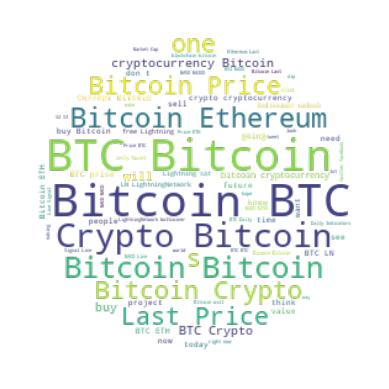

In [22]:
from wordcloud import WordCloud

text = ' '.join(list(set(worldcloud)))

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color=None, mode="RGBA", repeat=True, mask=mask, max_words=10000, width=1200, height=850, margin=2)
wc.generate(text)
wc.to_file('C:/Users/PEGON/Desktop/mémoire/MEMOIREPROPRE/STREAMLIT/streamlit/streamlit/wc2.png')

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
#plt.figure(figsize=(16, 16))
#plt.savefig('C:/Users/PEGON/Desktop/mémoire/MEMOIREPROPRE/STREAMLIT/streamlit/streamlit/wordcloudgood.png')
plt.show()